# ODE's

## Euler forward

1.1000
1.1905
1.2724
1.3464
1.4135
1.4741
1.5290
1.5787
1.6236
1.6643
1.7010
1.7343
1.7644
1.7917
1.8164
1.8387
1.8589
1.8771
1.8937
1.9086


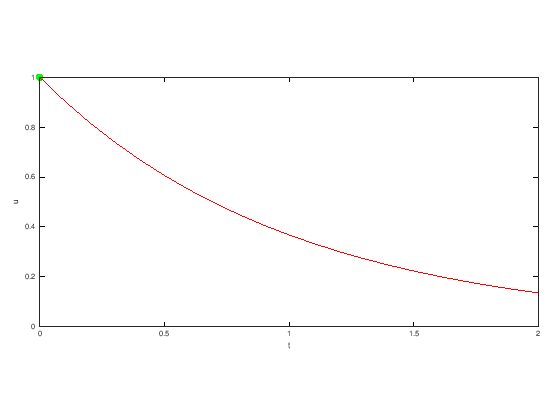

In [54]:
stepSize = 20;
startValue = 1.0;
y = @(t)(exp(-t));

graphics_toolkit ("gnuplot")

function [t,u] = ForwardEuler(f, tRange, u0, N)
    t = zeros(N+1,1);
    t(1) = tRange(1);
    h = (tRange(2)-tRange(1))/N;
    u(:,1) = u0;
    for n = 1 :N
        t(n+1) = t(n)+h;
        u(:,n+1)=u(:,n)+h*feval(f,t(n),u(:,n));
        disp(u(:,n+1))
    end
endfunction

function du = my_ode(t,u)
% du = my_ode(t,u) is the RHS function for the ODE u'=-u
% t is the independent variable
% u is the dependent variable
% du is u'
    du = -u;
endfunction

[t,u] = ForwardEuler(y, [0.0,2.0], startValue, stepSize);
plot(t,u,'-go','MarkerFaceColor','g');
hold on
% [t1,u1] = BackwardEuler(y, [0.0,2.0], startValue, stepSize); % <- replaced "my_ode" with y
axis equal, axis([0 2 0 1]), xlabel('t'), ylabel('u')
% plot(t1,y1,'-b','LineWidth',2);
plot(t,exp(-t),'-r','LineWidth',2);

In [30]:
dy = @(y)y
f = @(x)-3;

x0 = 0;
xn = 2;
y = 1;
h = 0.5;

for x = x0 : h: xn-h
    y = y + dy(x,y)*h;
    x = x + h;
    disp(x);
    disp(y);
    disp(f(x));
end

dy =

@(x, y) y

0.5000
1.5000
   1.0000
   0.9048
   0.8187
   0.7408
   0.6703
   0.6065
   0.5488
   0.4966
   0.4493
   0.4066
   0.3679
   0.3329
   0.3012
   0.2725
   0.2466
   0.2231
   0.2019
   0.1827
   0.1653
   0.1496
   0.1353
1
2.2500
   1.0000
   0.9048
   0.8187
   0.7408
   0.6703
   0.6065
   0.5488
   0.4966
   0.4493
   0.4066
   0.3679
   0.3329
   0.3012
   0.2725
   0.2466
   0.2231
   0.2019
   0.1827
   0.1653
   0.1496
   0.1353
1.5000
3.3750
   1.0000
   0.9048
   0.8187
   0.7408
   0.6703
   0.6065
   0.5488
   0.4966
   0.4493
   0.4066
   0.3679
   0.3329
   0.3012
   0.2725
   0.2466
   0.2231
   0.2019
   0.1827
   0.1653
   0.1496
   0.1353
2
5.0625
   1.0000
   0.9048
   0.8187
   0.7408
   0.6703
   0.6065
   0.5488
   0.4966
   0.4493
   0.4066
   0.3679
   0.3329
   0.3012
   0.2725
   0.2466
   0.2231
   0.2019
   0.1827
   0.1653
   0.1496
   0.1353


In [43]:
function [t,u] = BackwardEuler(f, tRange, u0, N)
% Use backward (implicit) Euler to solve a system of 1st-order ODEs of the form
% u’=f(t,u). Here f = name of an m-file which defines "du = f(u,t)" to compute % the RHS of the ODE as a row vector. tRange = [t0,t1], where the solution will
% be computed for t0<=t<=t1. Also
% u0 = column vector of initial values for u at t0
% N = number of equally-sized steps from t0 to t1 %t =rowvectorofvaluesoft
% u = matrix whose n-th row is the approx. solution at t(n).
    t = zeros(N+1,1); % initialize t t(1) = tRange(1);
    h = (tRange(2)-tRange(1))/N; % step size u(:,1) = u0; % u0
    for n = 1 : N
        t(n+1) = t(n) + h;
        options = optimset("Display","off","TolFun",1e-8,'TolX',1e-8);
        [u(:,n+1),Fval,exitflag] = fsolve(@(x) x - u(:,n) - h * feval(f, t(n+1), x), u(:,n), options);
    end
endfunction